# COMP5310 Assignment 2
*Make sure you change the file name with your unikey*

# 1. Data set up


## 1.1 Load Data






In [1]:
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
#download the and load data from google drive using id
# zip id: 1OVQeurQR6y61ZjUFETleGMVYpO1EUXUW
id = '1XsH62ATQY2k9F1f4sdNxxBy8IiR4mlFp'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dota2_dat.csv')
 

id = '1kWIqoc_bXF1UwN6AzR2brxyvWjo3aQmv'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('hero_names.csv')

## 1.2 Preprocess Data

In [2]:

import numpy as np
from glob import glob
from numpy import asarray
import pandas as pd
 
hero_id_max = 113
dota2_dat = pd.read_csv('dota2_dat.csv') 
 
dota2_list = dota2_dat.values.tolist()


sample_in = []
sample_out = []

radiant_hero = list(map(int,dota2_list[41111][4].split(',')))
dire_hero = list(map(int,dota2_list[41111][5].split(',')))
print(dota2_list[1]) 
print(dire_hero)


for i in range(len(dota2_list)):
  radiant_vector = np.zeros(hero_id_max)
  dire_vector = np.zeros(hero_id_max)
  radiant_hero = list(map(int,dota2_list[i][4].split(',')))
  dire_hero = list(map(int,dota2_list[i][5].split(',')))
  for item in radiant_hero:
    radiant_vector[item-1] = 1
  for item in dire_hero:
    dire_vector[item-1] = 1
  sample_in.append([radiant_vector,dire_vector])

  if dota2_list[i][3]==True:
    win = 1.0
  else:
    win = 0.0
  sample_out.append(win)


sample_in = np.asarray(sample_in)
sample_out = np.asarray(sample_out)
print("sammple_in shape: ", sample_in.shape)
print(sample_in[0])

print("sammple_out shape: ", sample_out.shape)
print(sample_out)

print("radiant hero id: ", dota2_list[0][4]) 
print("dire hero id: ", dota2_list[0][5]) 

[1, '2015-11-05 19:51:18', 2582, False, '7,82,71,39,21', '73,22,5,67,106']
[41, 11, 16, 25, 36]
sammple_in shape:  (48124, 2, 113)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
sammple_out shape:  (48124,)
[1. 0. 0. ... 1. 1. 0.]
radiant hero id:  86,51,83,11,67
dire hero id:  106,102,46,7,73


In [3]:
hero_names = pd.read_csv('hero_names.csv') 
hero_id_name = hero_names.drop(["name"], axis=1)
hero_name_dict = hero_id_name.set_index('hero_id').T.to_dict('list')
print(hero_name_dict)
print(hero_name_dict[1][0])

{1: ['Anti-Mage'], 2: ['Axe'], 3: ['Bane'], 4: ['Bloodseeker'], 5: ['Crystal Maiden'], 6: ['Drow Ranger'], 7: ['Earthshaker'], 8: ['Juggernaut'], 9: ['Mirana'], 10: ['Morphling'], 11: ['Shadow Fiend'], 12: ['Phantom Lancer'], 13: ['Puck'], 14: ['Pudge'], 15: ['Razor'], 16: ['Sand King'], 17: ['Storm Spirit'], 18: ['Sven'], 19: ['Tiny'], 20: ['Vengeful Spirit'], 21: ['Windranger'], 22: ['Zeus'], 23: ['Kunkka'], 25: ['Lina'], 26: ['Lion'], 27: ['Shadow Shaman'], 28: ['Slardar'], 29: ['Tidehunter'], 30: ['Witch Doctor'], 31: ['Lich'], 32: ['Riki'], 33: ['Enigma'], 34: ['Tinker'], 35: ['Sniper'], 36: ['Necrophos'], 37: ['Warlock'], 38: ['Beastmaster'], 39: ['Queen of Pain'], 40: ['Venomancer'], 41: ['Faceless Void'], 42: ['Wraith King'], 43: ['Death Prophet'], 44: ['Phantom Assassin'], 45: ['Pugna'], 46: ['Templar Assassin'], 47: ['Viper'], 48: ['Luna'], 49: ['Dragon Knight'], 50: ['Dazzle'], 51: ['Clockwerk'], 52: ['Leshrac'], 53: ["Nature's Prophet"], 54: ['Lifestealer'], 55: ['Dark Seer

## 1.3 Normalization and PCA

In [ ]:
nsamples, nx, ny = sample_in.shape
sample_in_1d = sample_in.reshape((nsamples,nx*ny))



(48124, 226)


sample_in 1d shape: (48124, 226)


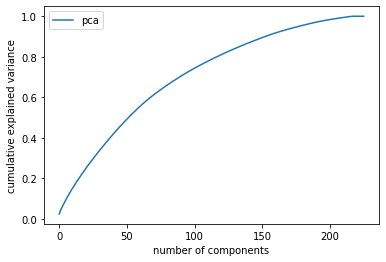

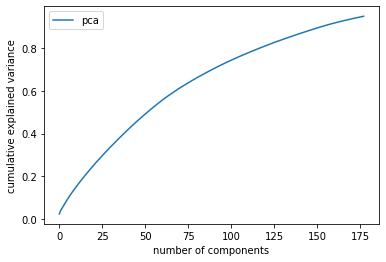

n_components= 178


[ 0.26539194  0.84520905  0.4194105   0.31942687 -0.22132725  0.60513259
 -0.07230707 -0.04914749  0.64553104 -0.20801863  0.08637064 -0.0350171
  0.01921507  0.24300133  0.30367117 -0.20196778 -0.43632851  0.61847819
  0.0014559  -0.1366159   0.1008008   0.50591333  0.33049091  0.29259934
 -0.16645426  0.1192675  -0.32400263  0.20165733  0.1595543  -0.17219674
 -0.08608044 -0.25004229  0.35419533  0.15447898 -0.04009374 -0.21414088
 -0.47254048  0.37226019  0.34355061 -0.45151422  0.09481741 -0.33281008
 -0.19705783 -0.06005229 -0.38430474 -0.13784685 -0.02579034 -0.05506946
 -0.33707122  0.08307784 -0.10182427  0.17567559  0.11498726 -0.07096663
  0.05453233  0.1956585  -0.43905505 -0.03161467  0.14834245 -0.12539523
  0.42308091  0.46815515  0.37411588 -0.1876473  -0.02132429  0.40132047
 -0.3606506   0.38793951  0.02008103 -0.00893266  0.10824237  0.15694195
  0.16070919 -0.00719033 -0.02089443  0.51359116  0.23052271  0.07632509
 -0.17201515 -0.13381492 -0.3514

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def selectPCA(dataset, n, method = "pca" ):
  scal = StandardScaler()

  #dataset_norm = scal.fit_transform(dataset)

  % matplotlib inline
  import matplotlib.pyplot as plt

  if method == "pca":
    pca_dims = PCA()
    pca_dims.fit(dataset)
    plt.plot(np.cumsum(pca_dims.explained_variance_ratio_), label="pca")
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

    plt.legend(loc="upper left")
    plt.show()


    cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
    d = np.argmax(cumsum >= 0.95) + 1
    pca  = PCA(n_components=d)

    
    dataset_reduced = pca.fit_transform(dataset)

    plt.plot(np.cumsum(pca.explained_variance_ratio_), label="pca")
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

    plt.legend(loc="upper left")
    plt.show()
  if method == "svd":
    dataset = scal.fit_transform(dataset)
    svd_dims = TruncatedSVD(n_components=n)
    svd_dims.fit(dataset)
    plt.plot(np.cumsum(svd_dims.explained_variance_ratio_), label="svd")
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

    plt.legend(loc="upper left")
    plt.show()


    cumsum = np.cumsum(svd_dims.explained_variance_ratio_)
    d = np.argmax(cumsum >= 0.95) + 1
    svd  = TruncatedSVD(n_components=d)

    
    dataset_reduced = svd.fit_transform(dataset)

    plt.plot(np.cumsum(svd.explained_variance_ratio_), label="svd")
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');

    plt.legend(loc="upper left")
    plt.show()




  print("n_components=",d)
  print("\n")
  print(dataset_reduced[0])

  return dataset_reduced


print("sample_in 1d shape:",sample_in_1d.shape)
dataset_reduced_1 = selectPCA(sample_in_1d, 1, "pca")

## 1.4 Split Data

In [4]:
def split_sample(sample_in, sample_out):
    train_x = []
    train_y = []
    test_x = []
    test_y = []
    validate_x = []
    validate_y = []
    for i in range(len(sample_in)):
        if i%10==8:
            test_x.append(sample_in[i])
            test_y.append(sample_out[i])
        elif i%10==9:
            validate_x.append(sample_in[i])
            validate_y.append(sample_out[i])
        else:
            train_x.append(sample_in[i])
            train_y.append(sample_out[i])
    return train_x,train_y,test_x,test_y,validate_x,validate_y

train_x,train_y,test_x,test_y,validate_x,validate_y = split_sample(sample_in, sample_out)

In [9]:
print(np.asarray(train_x).shape)
print(np.asarray(train_y).shape)
print(np.asarray(test_x).shape)
print(np.asarray(test_y).shape)
print(np.asarray(validate_x).shape)
print(np.asarray(validate_y).shape)

(38500, 2, 113)
(38500,)
(4812, 2, 113)
(4812,)
(4812, 2, 113)
(4812,)




---


# 2. Train Model

In [5]:
import math
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation, Embedding, Masking, Dropout, Conv1D, MaxPooling1D, Reshape
from keras.models import load_model



# Parameters
predict_step = 1
team_num = 2   
cnn_output_dim = 64 
kernel_size = 13
pool_size = 2       
hidden_size = 256  
epochs = 2000      
batch_size = 1000  

hero_id_max = 113   



tx = np.array(train_x).reshape(len(train_x),team_num,hero_id_max)
ty = np.array(train_y).reshape(len(train_y),1)
test_x = np.array(test_x).reshape(len(test_x),team_num,hero_id_max)
test_y = np.array(test_y).reshape(len(test_y),1)
validate_x = np.array(validate_x).reshape(len(validate_x),team_num,hero_id_max)
validate_y = np.array(validate_y).reshape(len(validate_y),1)

print('=========== tx.shape:',tx.shape,' ===============')
print('=========== ty.shape:',ty.shape,' ===============')
print('=========== test_x.shape:',test_x.shape,' ===============')
print('=========== test_y.shape:',test_y.shape,' ===============')
print('=========== validate_x.shape:',validate_x.shape,' ===============')
print('=========== validate_y.shape:',validate_y.shape,' ===============')

def train_save_model(model_name):
  callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='min'),\
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=0, mode='min',\
          epsilon=0.0001, cooldown=0, min_lr=0)]
  hist = model.fit(tx,ty,batch_size=batch_size,epochs=epochs,shuffle=True,\
      validation_data=(validate_x, validate_y),callbacks=callbacks)
  model.save(model_name+'.h5')

=========== tx.shape: (38500, 2, 113)  ===============
=========== ty.shape: (38500, 1)  ===============
=========== test_x.shape: (4812, 2, 113)  ===============
=========== test_y.shape: (4812, 1)  ===============
=========== validate_x.shape: (4812, 2, 113)  ===============
=========== validate_y.shape: (4812, 1)  ===============


## 2.1 CNN

In [6]:
#CNN 
model_name = '5310_cnn'
model = Sequential()
model.add(Conv1D(cnn_output_dim,kernel_size,padding='same',activation='relu',input_shape=(team_num,hero_id_max)))  
model.add(MaxPooling1D(pool_size=pool_size,data_format='channels_first'))  
model.add(Reshape((int(team_num*cnn_output_dim/pool_size),), input_shape=(team_num,int(cnn_output_dim/pool_size))))
model.add(Dropout(0.2))
model.add(Dense((10),input_shape=(team_num,cnn_output_dim/pool_size)))
model.add(Dropout(0.2))
model.add(Dense(1))              
model.add(Activation('sigmoid'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

train_save_model(model_name)

Epoch 1/2000
39/39 [==============================] - 17s 49ms/step - loss: 0.2483 - accuracy: 0.5346 - val_loss: 0.2393 - val_accuracy: 0.5871
Epoch 2/2000
39/39 [==============================] - 1s 33ms/step - loss: 0.2361 - accuracy: 0.5992 - val_loss: 0.2368 - val_accuracy: 0.5960
Epoch 3/2000
39/39 [==============================] - 1s 34ms/step - loss: 0.2314 - accuracy: 0.6136 - val_loss: 0.2367 - val_accuracy: 0.6008
Epoch 4/2000
39/39 [==============================] - 1s 33ms/step - loss: 0.2292 - accuracy: 0.6228 - val_loss: 0.2367 - val_accuracy: 0.5991
Epoch 5/2000
39/39 [==============================] - 1s 34ms/step - loss: 0.2277 - accuracy: 0.6284 - val_loss: 0.2371 - val_accuracy: 0.5970
Epoch 6/2000
39/39 [==============================] - 1s 33ms/step - loss: 0.2250 - accuracy: 0.6332 - val_loss: 0.2371 - val_accuracy: 0.5987


## 2.2 LSTM

In [7]:
# LSTM
model_name = '5310_lstm'
model = Sequential()
model.add(LSTM(hidden_size, input_shape=(team_num,hero_id_max), return_sequences=False))  
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Dropout(0.2))
model.add(Dense(1))              
model.add(Activation('sigmoid'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

train_save_model(model_name)

Epoch 1/2000
39/39 [==============================] - 10s 127ms/step - loss: 0.2493 - accuracy: 0.5136 - val_loss: 0.2436 - val_accuracy: 0.5684
Epoch 2/2000
39/39 [==============================] - 4s 113ms/step - loss: 0.2399 - accuracy: 0.5890 - val_loss: 0.2361 - val_accuracy: 0.5987
Epoch 3/2000
39/39 [==============================] - 4s 112ms/step - loss: 0.2354 - accuracy: 0.5992 - val_loss: 0.2356 - val_accuracy: 0.6054
Epoch 4/2000
39/39 [==============================] - 4s 112ms/step - loss: 0.2336 - accuracy: 0.6096 - val_loss: 0.2358 - val_accuracy: 0.5975
Epoch 5/2000
39/39 [==============================] - 4s 112ms/step - loss: 0.2331 - accuracy: 0.6086 - val_loss: 0.2357 - val_accuracy: 0.6014


## 2.1 CNN + LSTM

In [8]:
#CNN + LSTM 
model_name = '5310_cnn_lstm'
model = Sequential()
model.add(Conv1D(cnn_output_dim,kernel_size,padding='same',input_shape=(team_num,hero_id_max)))  
model.add(MaxPooling1D(pool_size=pool_size,data_format='channels_first'))  
model.add(LSTM(hidden_size, input_shape=(team_num,(cnn_output_dim/pool_size)), return_sequences=False))  
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Dropout(0.2))
model.add(Dense(1))              
model.add(Activation('sigmoid'))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])

train_save_model(model_name)

Epoch 1/2000
39/39 [==============================] - 8s 147ms/step - loss: 0.2491 - accuracy: 0.5228 - val_loss: 0.2407 - val_accuracy: 0.5761
Epoch 2/2000
39/39 [==============================] - 5s 130ms/step - loss: 0.2368 - accuracy: 0.5980 - val_loss: 0.2361 - val_accuracy: 0.6022
Epoch 3/2000
39/39 [==============================] - 5s 129ms/step - loss: 0.2301 - accuracy: 0.6167 - val_loss: 0.2369 - val_accuracy: 0.6002
Epoch 4/2000
39/39 [==============================] - 5s 129ms/step - loss: 0.2262 - accuracy: 0.6297 - val_loss: 0.2371 - val_accuracy: 0.6000




---


# 3. Test Model

In [9]:

def test_model(model_name):
  tag_line = 0.6
  # load model
  keras.backend.clear_session()    
  model = load_model(model_name+'.h5')
  out0 = model.predict(test_x)
  correct_num = 0
  for i in range(len(out0)):
      if out0[i][0]<0.5:
          temp_result = 0.0
      else:
          temp_result = 1.0
      if temp_result==test_y[i][0]:
          correct_num += 1
  print('Test dataset accuracy：',float(correct_num)/len(test_x))

  out1 = model.predict(tx)
  correct_num = 0
  for i in range(len(out1)):
      if out1[i][0]<0.5:
          temp_result = 0.0
      else:
          temp_result = 1.0
      if temp_result==ty[i][0]:
          correct_num += 1
  print('Train dataset accuracy：',float(correct_num)/len(tx))

  out2 = model.predict(validate_x)
  correct_num = 0
  for i in range(len(out2)):
      if out2[i][0]<0.5:
          temp_result = 0.0
      else:
          temp_result = 1.0
      if temp_result==validate_y[i][0]:
          correct_num += 1
  print('Validate dataset accuracy：',float(correct_num)/len(validate_x))

  correct_num = 0
  compare_num = 0
  for i in range(len(out0)):
      if out0[i][0]<(1.0-tag_line) or out0[i][0]>tag_line:
          compare_num += 1
          if out0[i][0]<0.5:
              temp_result = 0.0
          else:
              temp_result = 1.0
          if temp_result==test_y[i][0]:
              correct_num += 1
  print('Test dataset,the accuracy of the predicted win rate over '+str(tag_line)+'：',float(correct_num)/compare_num,\
      ' ('+str(correct_num)+'/'+str(compare_num)+')')

  for i in range(5):
      tag_line = 0.75+0.05*i
      correct_num = 0
      compare_num = 0

      for i in range(len(out0)):
          if out0[i][0]<(1.0-tag_line) or out0[i][0]>tag_line:
              
              compare_num += 1
              if out0[i][0]<0.5:
                  temp_result = 0.0
              else:
                  temp_result = 1.0
              if temp_result==test_y[i][0]:
                  correct_num += 1
      if compare_num!=0:
          print('Test dataset,the accuracy of the predicted win rate over '+str(tag_line)+'：',float(correct_num)/compare_num,\
              ' ('+str(correct_num)+'/'+str(compare_num)+')')
      else:
          print('Test dataset,the accuracy of the predicted win rate over '+str(tag_line)+'：','0.0',\
              ' ('+str(correct_num)+'/'+str(compare_num)+')')
          



def get_hero_id(model_name, win_rate):
  print("Print the line-up with win rate over ", win_rate, '\n')
  # load model
  keras.backend.clear_session()    
  model = load_model(model_name+'.h5')
  out0 = model.predict(test_x)

  for i in range(len(out0)):
    if out0[i][0]>=win_rate or out0[i][0]<=(1.0-win_rate):
      radiant_id=[]
      dire_id=[]
      for j in range(len(test_x[i][0])):
        if test_x[i][0][j]==1:
          radiant_id.append(hero_name_dict[j+1][0])
        if test_x[i][1][j]==1:
          dire_id.append(hero_name_dict[j+1][0])

      print('radiant heros: ', radiant_id)
      print('dire heros: ', dire_id)
      print('predicted win rate: ', out0[i][0])
      print('actual win rate: ', test_y[i])
      print('\n')
  


## 3.1 CNN

In [10]:
model_name = '5310_cnn'
test_model(model_name)
print('\n')
get_hero_id(model_name, 0.85)

Test dataset accuracy： 0.594139650872818
Train dataset accuracy： 0.6426493506493507
Validate dataset accuracy： 0.5987115544472152
Test dataset,the accuracy of the predicted win rate over 0.6： 0.6573304157549235  (1502/2285)
Test dataset,the accuracy of the predicted win rate over 0.75： 0.7511111111111111  (169/225)
Test dataset,the accuracy of the predicted win rate over 0.8： 0.8125  (52/64)
Test dataset,the accuracy of the predicted win rate over 0.85： 0.6666666666666666  (4/6)
Test dataset,the accuracy of the predicted win rate over 0.9： 0.0  (0/0)
Test dataset,the accuracy of the predicted win rate over 0.95： 0.0  (0/0)


Print the line-up with win rate over  0.85 

radiant heros:  ['Windranger', 'Phantom Assassin', "Nature's Prophet", 'Broodmother', 'Rubick']
dire heros:  ['Crystal Maiden', 'Earthshaker', 'Shadow Fiend', 'Venomancer', 'Ursa']
predicted win rate:  0.13141668
actual win rate:  [0.]


radiant heros:  ['Pudge', 'Witch Doctor', 'Spectre', 'Silencer', 'Undying']
dire her

## 3.1 LSTM

In [13]:
model_name = '5310_lstm'
test_model(model_name)
print('\n')
get_hero_id(model_name, 0.85)

Test dataset accuracy： 0.6012053200332502
Train dataset accuracy： 0.6124155844155844
Validate dataset accuracy： 0.6014131338320865
Test dataset,the accuracy of the predicted win rate over 0.6： 0.6633663366336634  (1474/2222)
Test dataset,the accuracy of the predicted win rate over 0.75： 0.7591623036649214  (145/191)
Test dataset,the accuracy of the predicted win rate over 0.8： 0.7441860465116279  (32/43)
Test dataset,the accuracy of the predicted win rate over 0.85： 0.5  (2/4)
Test dataset,the accuracy of the predicted win rate over 0.9： 0.0  (0/0)
Test dataset,the accuracy of the predicted win rate over 0.95： 0.0  (0/0)


Print the line-up with win rate over  0.85 

radiant heros:  ['Windranger', 'Phantom Assassin', "Nature's Prophet", 'Broodmother', 'Rubick']
dire heros:  ['Crystal Maiden', 'Earthshaker', 'Shadow Fiend', 'Venomancer', 'Ursa']
predicted win rate:  0.12564245
actual win rate:  [0.]


radiant heros:  ['Venomancer', 'Spirit Breaker', 'Silencer', 'Tusk', 'Abaddon']
dire h

## 3.1 CNN + LSTM

In [14]:
model_name = '5310_cnn_lstm'
test_model(model_name)
print('\n')
get_hero_id(model_name, 0.9)

Test dataset accuracy： 0.5978802992518704
Train dataset accuracy： 0.638961038961039
Validate dataset accuracy： 0.5999584372402328
Test dataset,the accuracy of the predicted win rate over 0.6： 0.6553225168183617  (1656/2527)
Test dataset,the accuracy of the predicted win rate over 0.75： 0.7184986595174263  (268/373)
Test dataset,the accuracy of the predicted win rate over 0.8： 0.7154471544715447  (88/123)
Test dataset,the accuracy of the predicted win rate over 0.85： 0.625  (15/24)
Test dataset,the accuracy of the predicted win rate over 0.9： 1.0  (1/1)
Test dataset,the accuracy of the predicted win rate over 0.95： 0.0  (0/0)


Print the line-up with win rate over  0.9 

radiant heros:  ['Venomancer', 'Spirit Breaker', 'Silencer', 'Tusk', 'Abaddon']
dire heros:  ['Anti-Mage', 'Sniper', 'Queen of Pain', 'Huskar', 'Legion Commander']
predicted win rate:  0.9167284
actual win rate:  [1.]


